In [1]:
from modules import *
from functions.tools import *
from functions.TestFuns import *
from models import models_classes as models
from functions.run import *
from functions.exploratory import *

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


# General rundown

In [7]:
# n,d = 100, 200
n, d = 10,30

# kernel_name = 'laplacian'
# sigma = 10
# kernel = get_kernel(kernel_name, sigma)
num_permutations = 1000
kappa_K = 1e6

X = np.random.multivariate_normal(np.zeros(d), np.eye(d), n)
Y = np.random.multivariate_normal(np.zeros(d), np.eye(d)*5, n)

# -------
start = time.time()
p_value = CKE_two_sample_test(X,Y,'FH', kappa_K)(num_permutations)
runtime = (time.time() - start).__round__(2)
print(f'CKE (FH) -- {p_value} || {runtime}s')
# -------
start = time.time()
p_value = CKE_two_sample_test(X,Y,'OT', kappa_K)(num_permutations)
runtime = (time.time() - start).__round__(2)
print(f'CKE (OT) -- {p_value} || {runtime}s')
# -------
start = time.time()
p_value = MMD_two_sample_test(X,Y)(num_permutations)
runtime = (time.time() - start).__round__(2)
print(f'MMD -- {p_value} || {runtime}s')
# -------
start = time.time()
p_value = KNN_two_sample_test(X,Y)(num_permutations)
runtime = (time.time() - start).__round__(2)
print(f'KNN -- {p_value} || {runtime}s')
# -------
start = time.time()
p_value = FR_two_sample_test(X,Y)(num_permutations)
runtime = (time.time() - start).__round__(2)
print(f'FR -- {p_value} || {runtime}s')
# -------
start = time.time()
p_value = MPZ_two_sample_test(X,Y)(num_permutations)
runtime = (time.time() - start).__round__(2)
print(f'MPZ -- {p_value} || {runtime}s')
# -------
# start = time.time()
# p_value = MPZ_two_sample_test(X.T,Y.T)(num_permutations)
# runtime = (time.time() - start).__round__(2)
# print(f'MPZ (rev) -- {p_value} || {runtime}s')
# -------

CKE (FH) -- 0.0 || 0.52s
CKE (OT) -- 0.639 || 0.6s
MMD -- 0.0 || 0.03s


/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  ctypes.POINTER(_dl_phdr_info),


KNN -- 0.491 || 0.29s
FR -- 0.619 || 0.02s
MPZ -- 0.437 || 0.83s


# H0vsH1

  0%|          | 0/4 [00:00<?, ?it/s]

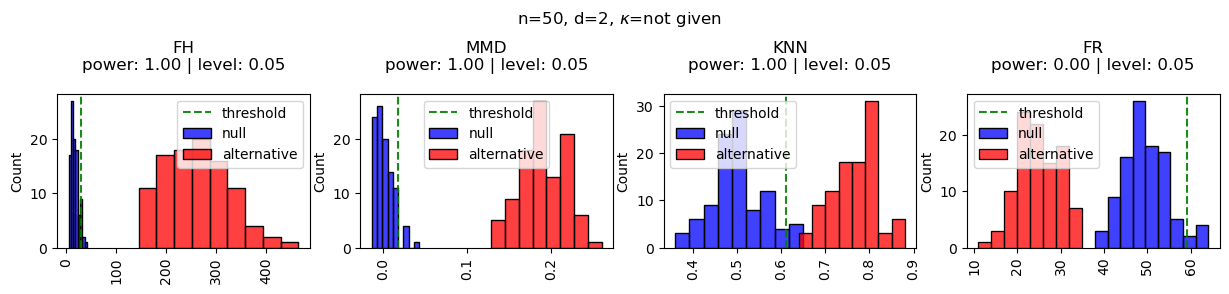

 25%|██▌       | 1/4 [00:03<00:09,  3.04s/it]

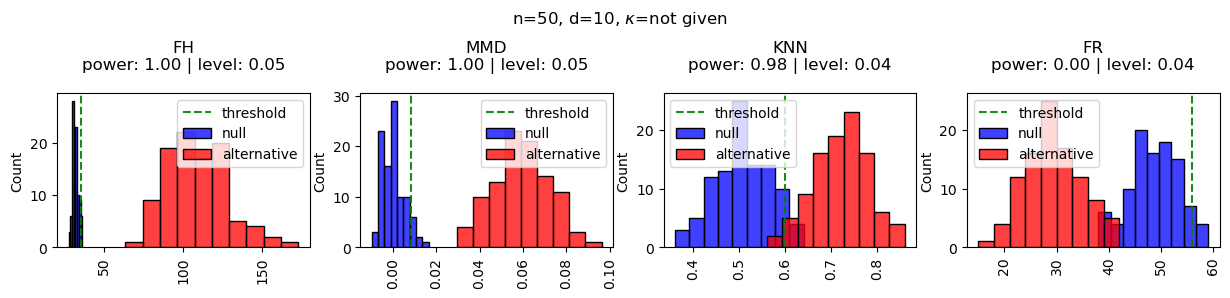

 50%|█████     | 2/4 [00:04<00:04,  2.25s/it]

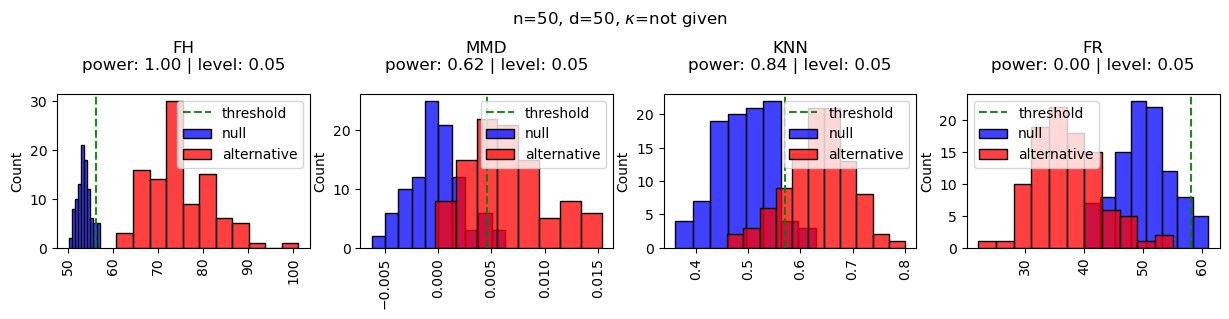

 75%|███████▌  | 3/4 [00:07<00:02,  2.38s/it]

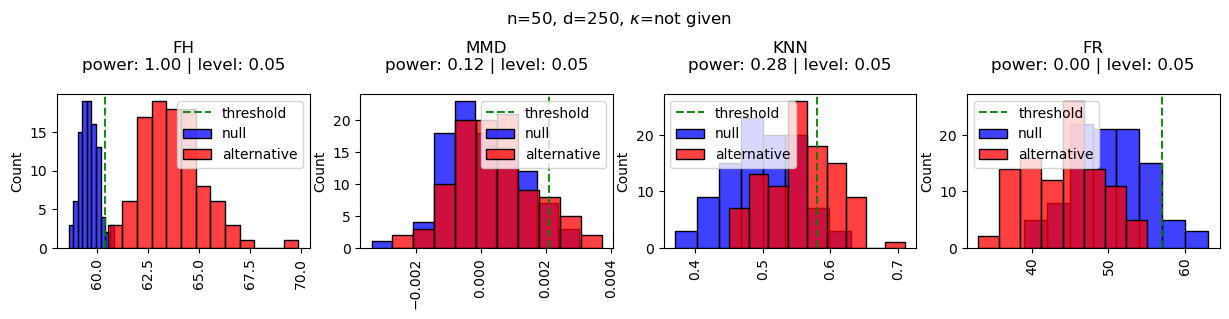

100%|██████████| 4/4 [00:15<00:00,  3.78s/it]


In [8]:
# _model_ = models.isotropic_different_means(1.3, 5)
_model_ = models.isotropic_vs_DiagSpiked(10, 2)
n = 50
n_d__values = [(n,2), (n,10), (n, 50), (n, 250)]
num_reps = 100
kappa_K = 1e6

test_names = ['FH', 'MMD', 'KNN', 'FR']
onesided_powerlevel = {}; twosided_powerlevel = {}
for n,d in tqdm(n_d__values):      
      null_vals, alternative_vals= H0_H1(n, d, _model_, test_names, kappa_K, num_reps, kernel = None, NUM_CORES=4)
      null_vals = {name : np.array(null_vals)[:,i] for i,name in enumerate(test_names)}
      alternative_vals = {name : np.array(alternative_vals)[:,i] for i,name in enumerate(test_names)}
      plot_H0_H1(null_vals, alternative_vals, test_names, n, d)

  0%|          | 0/2 [00:00<?, ?it/s]

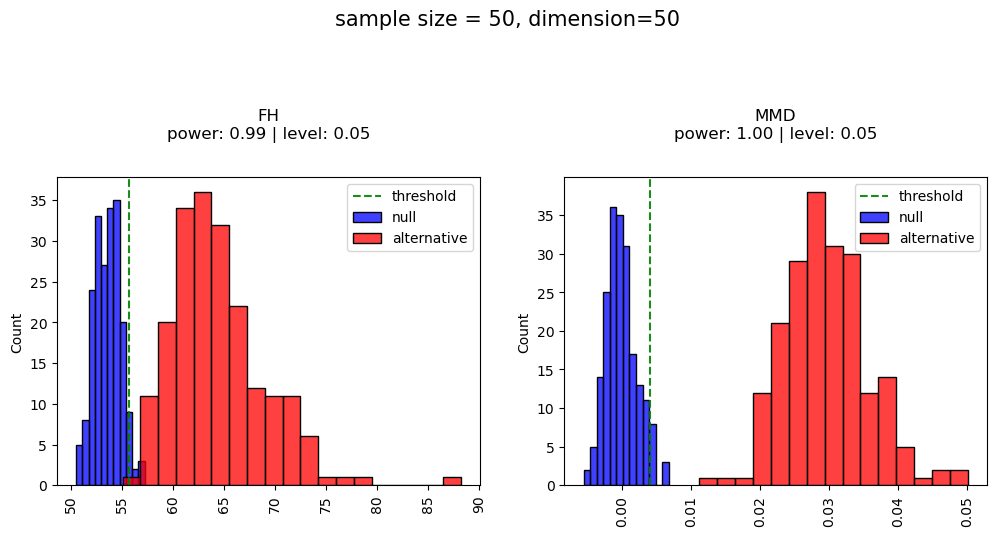

 50%|█████     | 1/2 [00:02<00:02,  2.79s/it]

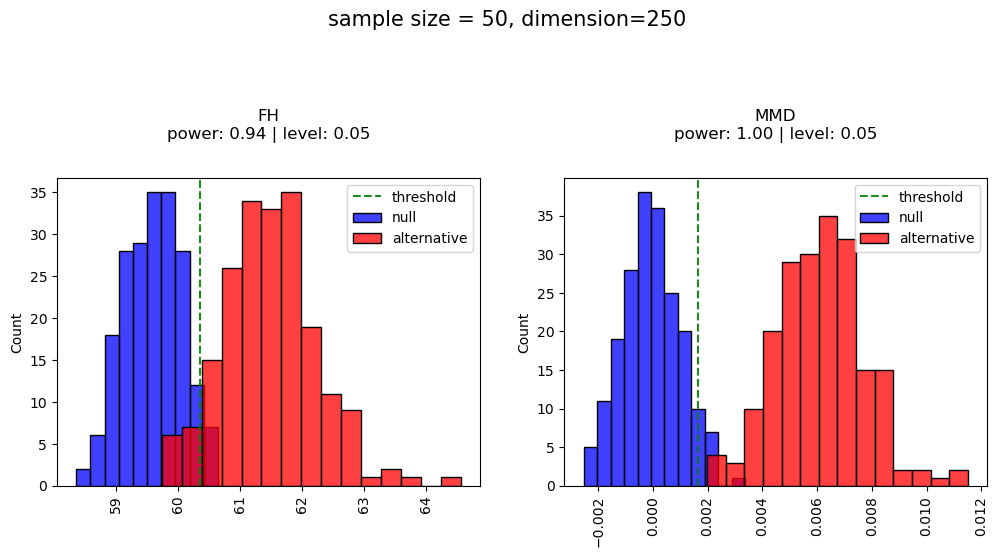

100%|██████████| 2/2 [00:16<00:00,  8.47s/it]


In [9]:
_model_ = models.isotropic_different_means(1.5, 20)
# _model_ = models.isotropic_vs_DiagSpiked(10, 2)
n = 50

n_d__values =  [(n, 50), (n, 250)]
num_reps = 200
kappa_K = 1e6

test_names = ['FH', 'MMD']
onesided_powerlevel = {}; twosided_powerlevel = {}

for n, d in tqdm(n_d__values):
    null_vals, alternative_vals= H0_H1(n, d, _model_, test_names, kappa_K, num_reps, kernel = None, NUM_CORES=4)
    null_vals = {name : np.array(null_vals)[:,i] for i,name in enumerate(test_names)}
    alternative_vals = {name : np.array(alternative_vals)[:,i] for i,name in enumerate(test_names)}


    fig, axs = plt.subplots(1,len(test_names), figsize=(12, 4)); axs = axs.ravel()

    fig.suptitle(f'sample size = {n}, dimension={d}', y=1.3, fontsize = 15)
    for ax, test in zip(axs, test_names):
        fromNULL = np.array(null_vals[test])
        fromALTERNATIVE = np.array(alternative_vals[test])
        sns.histplot(x = fromNULL, ax=ax, color='b', label = 'null')
        sns.histplot(x = fromALTERNATIVE, ax=ax, color='r', label = 'alternative')

        rthresh = np.quantile(fromNULL, .95)
        power = np.mean(fromALTERNATIVE > rthresh); 
        # level = np.mean(fromNULL > rthresh)
        level = 0.05
        ax.axvline(x=rthresh, color='g', linestyle='--', label = 'threshold', alpha =.9)

        ax.set_title(f'{test}\npower: {power:.2f} | level: {level:.2f}', y=1.1)
        ax.legend();
        ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False)); ax.ticklabel_format(style='plain', axis='x')
        for label in ax.get_xticklabels():
            label.set_rotation(90)
    plt.show()

# Permutation testing

In [3]:
from modules import *
from functions.tools import *
from functions.TestFuns import *
import models.models_classes as models
from functions.run import *



NUM_CORES = 4

n = 50

n_d_values = [(n, 50),(n, 250),(n, 500)]
num_permutations = 100
N_iters = 50

kappa_K = 1e4

test_names = ['FH', 'MMD', 'KNN', 'FR']

_model_ = models.isotropic_different_means
model_params = {'mu' : 1.25, 'numDiffLocs' :  50}

# _model_ = models.isotropic_vs_DiagSpiked
# model_params = {'num_spikes' : 20,  'spike_value' : 2}

# _model_ = models.isotropic_vs_scaledIsotropic
# model_params = {'sigma' : 1.2}

kernel_name = 'laplacian'
kernel_bandwith = None

# --------- do not touch below this line

def run_parallel(n, d, _model_, model_params, test_names, kernel_name, kernel_bandwith,  kappa_K, num_permutations, N_iters):
    iter_args = [(n, d, _model_,model_params, test_names, kernel_name, kernel_bandwith, kappa_K, num_permutations) for _ in range(N_iters)]
    results = Parallel(n_jobs=NUM_CORES)(delayed(run_iteration)(*args) for args in tqdm(iter_args, position=1, leave=False))
    return results

start_time = datetime.now()
results = []
for n, d in tqdm(n_d_values,position=0, leave=True):
    decisions_list = run_parallel(n, d, _model_, model_params, test_names, kernel_name, kernel_bandwith, kappa_K, num_permutations, N_iters)
    results.append(decisions_list)

end_time = datetime.now()

print("Run time:", end_time - start_time)


      
out = []
for name in test_names:
    for _, (n,d) in zip(results, n_d_values):
        out.append( [name, n,d, N_iters, kernel_name, kernel_bandwith, kappa_K, num_permutations,  pd.DataFrame(_).mean(0)[name] ])

model_name = _model_(**model_params)(0).name


if len( model_params.items()) > 1:
    folder_name = ''.join('{} : {}, '.format(key, value) for key, value in model_params.items())
else:
    folder_name = ''.join('{} : {}'.format(key, value) for key, value in model_params.items())

os.makedirs('out/' + model_name + '/' + folder_name, exist_ok=True)

ts = datetime.now().strftime("%Y-%m-%d_%H:%M")
data_out = pd.DataFrame(out, 
             columns= ['test', 'sample size', 'dimension', 'N_iters', 'kernel', 'kernel_bandwith', 'max conditioning number', 'num_permutations', 'percent of rejections']
             )
# data_out.to_csv(f'out/{model_name}/{folder_name}/{ts}.csv')

# -----


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:42<00:00, 14.09s/it]

Run time: 0:00:42.305483


<Figure size 1000x500 with 0 Axes>

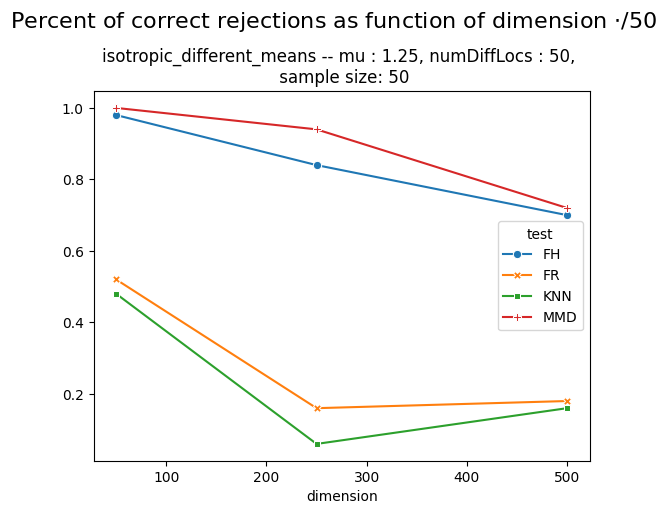

In [4]:
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()

fig.suptitle(f'Percent of correct rejections as function of dimension $\cdot/{N_iters}$', y=1.05, fontsize = 16)
ax.set_title(f'{model_name} -- {folder_name}\n sample size: {n}')
plot_data = data_out.pivot_table(index = ['sample size', 'dimension'], columns = ['test'], values = ['percent of rejections'] )['percent of rejections'].loc[n]

sns.lineplot( plot_data,
              markers=True, dashes=False)
plt.show()


# Check with TORCH TWO SAMPLE

In [3]:
# ! pip install git+https://github.com/josipd/torch-two-sample.git
from torch_two_sample.statistics_nondiff import FRStatistic, KNNStatistic 
from torch_two_sample.statistics_diff import MMDStatistic
import torch
import seaborn as sns
import matplotlib.pyplot as plt


## KNN, FR

In [ ]:
n,d = 50, 200
num_permutations = 100


knn_pvals = [ ]
fr_pvals = [ ]

for i in tqdm(range(100)):
    X = np.random.multivariate_normal(np.ones(d), np.eye(d), n)
    Y = np.random.multivariate_normal(np.ones(d)*.8, np.eye(d), n)
    X_torch = torch.autograd.Variable(torch.tensor(X, dtype=torch.float32))
    Y_torch = torch.autograd.Variable(torch.tensor(Y, dtype=torch.float32))


    p_value = KNN_two_sample_test(X,Y)(num_permutations)
    _stat = KNNStatistic(n,n, k =1)
    obs_val, distance_matrix = _stat(X_torch, Y_torch, ret_matrix=True)
    torch_pval = _stat.pval(distance_matrix).__round__(3)
    # print(f'KNN -- {p_value} | {torch_pval}')
    knn_pvals.append([p_value, torch_pval])
        
    p_value = FR_two_sample_test(X,Y)(num_permutations)
    _stat = FRStatistic(n,n)
    obs_val, distance_matrix = _stat(X_torch, Y_torch, ret_matrix=True)
    torch_pval = _stat.pval(distance_matrix).__round__(3)
    fr_pvals.append([1- p_value, torch_pval])
    # print(f'FR -- {1- p_value} | {torch_pval}')
fr_pvals = np.array(fr_pvals)
knn_pvals = np.array(knn_pvals)

  0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
100%|██████████| 100/100 [00:18<00:00,  5.34it/s]


Text(0.5, 1.0, 'FR')

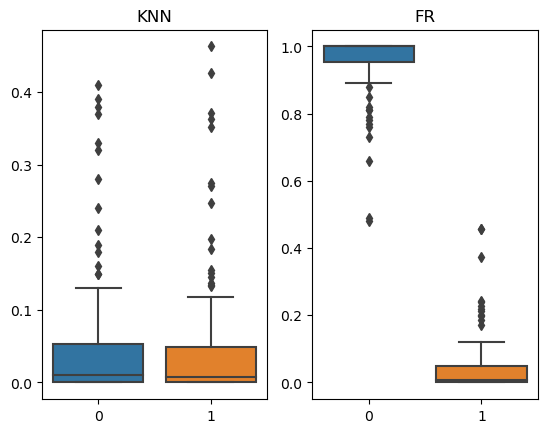

In [ ]:
fig,[axl,axr] = plt.subplots(1,2)
sns.boxplot(knn_pvals, ax = axl); axl.set_title('KNN')
sns.boxplot(fr_pvals, ax = axr); axr.set_title('FR')

## MMD

100%|██████████| 25/25 [00:01<00:00, 18.98it/s]
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


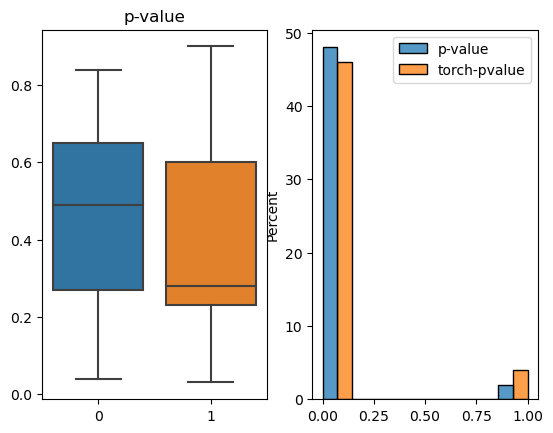

In [6]:
n,d = 150, 10
num_permutations = 100


kernel_name = 'gaussian'
kernel_bandwith = 1e-2


mmd_pvals = [ ]

for i in tqdm(range(25)):
    X = np.random.multivariate_normal(np.ones(d), .8*np.eye(d)/np.sqrt(d), n)
    # X = np.random.multivariate_normal(np.ones(d)*.85, np.eye(d), n)
    Y = np.random.multivariate_normal(np.ones(d), np.eye(d)/np.sqrt(d), n)
    X_torch = torch.autograd.Variable(torch.tensor(X, dtype=torch.float32))
    Y_torch = torch.autograd.Variable(torch.tensor(Y, dtype=torch.float32))
    p_value = MMD_two_sample_test(X,Y, kernel_name,kernel_bandwith )(num_permutations)
    _stat = MMDStatistic(n,n)
    obs_val, distance_matrix = _stat(X_torch, Y_torch, [kernel_bandwith], ret_matrix=True)
    torch_pval = _stat.pval(distance_matrix, num_permutations)
    mmd_pvals.append([p_value, torch_pval])
mmd_pvals = np.array(mmd_pvals)

fog,[axl,axr] = plt.subplots(1,2)
sns.boxplot(mmd_pvals, ax=axl); axl.set_title('p-value')
decisions = np.array(mmd_pvals< 0.05) 
sns.histplot(pd.DataFrame(decisions, columns=['p-value', 'torch-pvalue']), multiple="dodge", ax = axr, stat='percent')
plt.show()


plt.show()



In [ ]:
class MMD_two_sample_test:
    """
    Two-sample MMD test to determine if two samples come from the same distribution.
    Based on the method described in [Gretton et al., '12].

    Arguments:
    X (ndarray): First sample (n x d).
    Y (ndarray): Second sample (m x d).
    kernel (function): Kernel function.
    reg (float): Regularization parameter for the covariance matrices.

    Attributes:
    obs_value (float): Observed MMD statistic value.

    Methods:
    __call__: Perform the permutation test and return the p-value.
    """


    def __init__(self, X, Y,  kernel_bandwith):
        """
        Initialize the test class.
        """
        self.X = X; self.Y = Y
        n = len(X)
        m = len(Y)
        combined = np.vstack([X, Y])
        
        pairwise_dists = cdist(combined, combined, 'sqeuclidean')

        self.kernel_matrix  = np.exp( - pairwise_dists * kernel_bandwith)

        k_xx = self.kernel_matrix [:n, :n]    
        np.fill_diagonal(k_xx, 0)
        k_yy = self.kernel_matrix [m:, m:]    
        np.fill_diagonal(k_yy, 0)
        k_xy = self.kernel_matrix [:n, m:]    
        self.obs_value = mmd_from_kernel(self.kernel_matrix, n, m)

def mmd_from_kernel(kernel_matrix, n, m):

    k_xx = kernel_matrix [:n, :n]
    np.fill_diagonal(k_xx, 0)
    k_yy = kernel_matrix [m:, m:]
    np.fill_diagonal(k_yy, 0)
    k_xy = kernel_matrix [:n, m:]    

    obs_value = k_xx.sum()/(n*(n-1)) +  k_yy.sum()/(m*(m-1)) - 2* k_xy.sum()/(n*m)
    return obs_value

In [47]:
n,d = 150, 10
kernel_bandwith = 1e-2
X = np.random.multivariate_normal(np.ones(d), np.eye(d), n)
Y = np.random.multivariate_normal(np.ones(d), np.eye(d), n)

print(checkMMD(X,Y,kernel_bandwith))
print(MMD_two_sample_test(X,Y, kernel_bandwith).obs_value)

X_torch = torch.autograd.Variable(torch.tensor(X, dtype=torch.float32))
Y_torch = torch.autograd.Variable(torch.tensor(Y, dtype=torch.float32))
_stat = MMDStatistic(n,n)
print(_stat(X_torch, Y_torch, [kernel_bandwith]))


-0.0003093742895210472
-0.0003093742895210472
tensor(-0.0003)


tensor(-0.0004)

<Axes: ylabel='Count'>

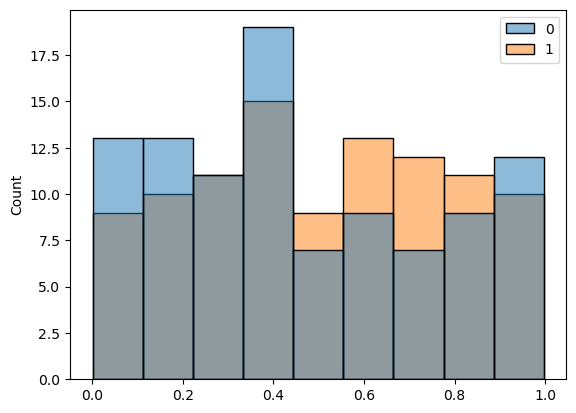

In [85]:
sns.histplot(data = mmd_pvals,)

In [ ]:

class MMD_two_sample_test:
    """
    Two-sample MMD test to determine if two samples come from the same distribution.
    Based on the method described in [Gretton et al., '12].

    Arguments:
    X (ndarray): First sample (n x d).
    Y (ndarray): Second sample (m x d).
    kernel (function): Kernel function.
    reg (float): Regularization parameter for the covariance matrices.

    Attributes:
    obs_value (float): Observed MMD statistic value.

    Methods:
    __call__: Perform the permutation test and return the p-value.
    """

    def __init__(self, X, Y, kernel=None,  reg=1e-5):
        """
        Initialize the test class.
        """
        self.X = X; self.Y = Y
        n = X.shape[0]
        m = Y.shape[0]
        n = n; m = m
        self.reg = reg
        combined = np.vstack([X, Y])
        
        if kernel is None:
            pairwise_dists = cdist(combined, combined, 'sqeuclidean')
            median_dist = np.median(pairwise_dists[pairwise_dists > 0])  # Avoid zero distances
            bandwidth = 2 * median_dist
            self.kernel_matrix  = np.exp( - cdist(combined, combined, 'sqeuclidean') / bandwidth)
        else:
            self.kernel_matrix  = kernel(combined, combined)  

        k_xx = self.kernel_matrix [:n, :n];    np.fill_diagonal(k_xx, reg)
        k_yy = self.kernel_matrix [n:, n:];    np.fill_diagonal(k_yy, reg)
        k_xy = self.kernel_matrix [:n, n:]    
        self.obs_value = k_xx.sum()/(n*(n-1)) + k_yy.mean()/(m*(m-1)) - 2 * k_xy.mean()/(n*m)
        
    def __call__(self, num_permutations=1000, return_stats=False):
        """
        Perform the permutation test and return the p-value.

        Parameters:
        num_permutations (int): Number of permutations for calibrating the test.
        return_stats (bool): If True, return the permuted statistics as well.

        Returns:
        float: p-value of the test.
        tuple: (permuted_stats, p_value) if return_stats is True.
        """
        n, m = len(self.X), len(self.Y)
        permuted_stats = []
        for _ in range(num_permutations):
            permuted_indices = np.random.permutation(n + m)
            reordered_kernel = self.kernel_matrix[permuted_indices][:, permuted_indices]
            _k_xx = reordered_kernel[:n, :n];    np.fill_diagonal(_k_xx, self.reg)
            _k_yy = reordered_kernel[n:, n:];    np.fill_diagonal(_k_yy, self.reg)
            _k_xy = reordered_kernel[:n, n:]
            _value = _k_xx.sum()/(n*(n-1)) + _k_yy.mean()/(m*(m-1)) - 2 * _k_xy.mean()/(m*n)
            permuted_stats.append(_value)
        p_value = np.mean(np.array(permuted_stats) >= self.obs_value)
        if not return_stats:
            return p_value
        else:
            return permuted_stats, p_value


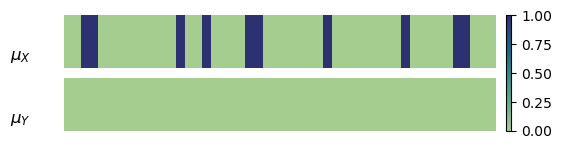

In [50]:
d = 50
mux = np.zeros(d); muy = np.zeros(d)
mux[np.random.choice(d, 10, replace=False)] = 1
fig, ax = plt.subplots(2, 1, figsize=(6, 1.5))

sns.heatmap(mux.reshape(1, -1), ax=ax[0], cmap="crest", cbar=False)
ax[0].set_title('$\mu_X$', y = 0, x=-0.1)
ax[0].axis('off')

sns.heatmap(muy.reshape(1, -1), ax=ax[1], cmap="crest", cbar=False)
ax[1].set_title('$\mu_Y$', y = 0, x=-0.1)
ax[1].axis('off')
fig.colorbar(ax[0].collections[0], ax=ax, orientation='vertical', fraction=0.05, pad=0.02)

plt.show()

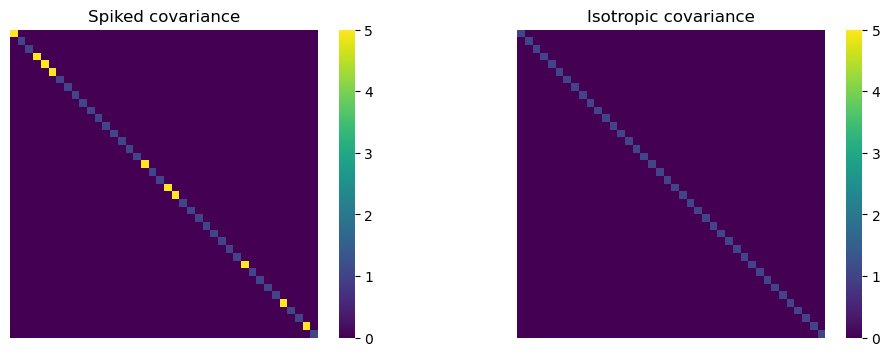

In [72]:
fig, [axl, axr] = plt.subplots(1,2, figsize=(12,4))
d = 40
spike_value = 5
sns.heatmap(spiked_covariance(d, num_spikes=10, spike_value=spike_value), ax=axl, square= True, cmap='viridis')
axl.set_title('Spiked covariance')

sns.heatmap(np.eye(d), ax=axr, vmin = 0, vmax = spike_value, square= True, cmap='viridis' )
axr.set_title('Isotropic covariance')

axl.axis('off')
axr.axis('off')
plt.show()




In [ ]:
sns.heatmap(spiked_covariance(50, num_spikes=10, spike_value=10), ax=axl)
axl.set_title('Spiked covariance')



------